In [ ]:
import torch
def getW(path):
    try:
        checkpoint = torch.load(path, map_location='cpu' , weights_only=False)
        print(f"成功加载 checkpoint 文件: {path}\n")
    except FileNotFoundError:
        print(f"错误：未找到文件 {path}。请检查路径是否正确。")
        return None
    except Exception as e:
        print(f"加载文件时发生错误: {e}")
        return None
    print("尝试读取Wq")
    Wq = checkpoint['model']['layers.0.blocks.0.cross_attn_token_to_image.in_proj_weight']
    print(Wq.shape)
    print(Wq)
    print(f"q的均值:{Wq.mean()} , q的方差:{Wq.std()}")
    return Wq

In [ ]:
checkpoint0 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2_fixWeightDecay_specAgentsLr/backup0.pth"
checkpoint200 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2/checkpoint.pth"
q0 = getW(checkpoint0)

# q200 = checkpoint = torch.load(checkpoint0, map_location='cpu' , weights_only=False)['model']['layers.0.q_pos'][0]
q200 = getW(checkpoint200)

成功加载 checkpoint 文件: /home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2_fixWeightDecay_specAgentsLr/backup0.pth

尝试读取Wq


KeyError: 'layers.0.blocks.0.cross_attn_token_to_image.out_proj_weight'

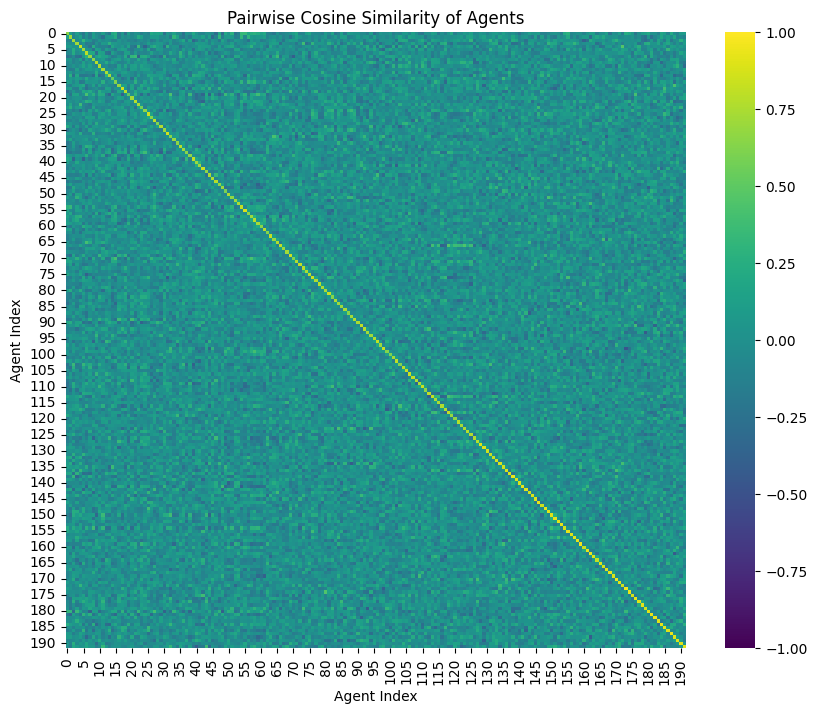

平均两两相似度: 0.7905


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# q0 = q0.detach().cpu()
q0_norm = torch.nn.functional.normalize(q0, p=2, dim=1)
q200_norm = torch.nn.functional.normalize(q200, p=2, dim=1)

sim_matrix = torch.mm(q0_norm, q200_norm.t()).numpy()


# 绘图
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.title("Pairwise Cosine Similarity of Agents")
plt.xlabel("Agent Index")
plt.ylabel("Agent Index")
plt.show()

# 打印平均非对角线相似度
mask = np.eye(sim_matrix.shape[0], dtype=bool)
avg_sim = sim_matrix[mask].mean()
print(f"平均两两相似度: {avg_sim:.4f}")

In [ ]:
mask = np.eye(sim_matrix.shape[0], dtype=bool)
avg_sim = sim_matrix[mask].mean()
print(f"平均对角线相似度: {avg_sim:.4f}")

平均对角线相似度: -0.0011
